In [1]:
import pandas as pd

In [42]:
df = pd.read_excel('C:/Users/ecaudron001/Documents/Github/semic_pledges/PledgeList.xlsx', 'Pledge List 25 October 2022') # Reading the source file and loading the data into a dataframe

In [10]:
df.head # Inspecting the first rows of the data

<bound method NDFrame.head of      Topic                                             Pledge  \
0        1  HOTREC calls for a level playing field and fai...   
1        1  Actually we as an association are still pretty...   
2        1  Estonia sees the need to synchronize and harmo...   
3        2  Achieve sustainable and flexible solutions for...   
4        2  The Ile-de-France Region aims to make tourist ...   
..     ...                                                ...   
255     27  The supporting programmes will provide 2 diffe...   
256     21  Higher education institutions and VET provider...   
257     28  Regional strategy for sustainable development ...   
258     28  “Lofoten the Green Islands 2030” is a programm...   
259     22  Actions:_x000D_\nUp/reskilling of the tourism ...   

                                     Organisation name        Country  \
0                                               HOTREC        Belgium   
1                          Deutscher Ferien

In [43]:
ToDrop = ["Organisation name", "Country", "Type"] # Variable that are not used for the purpose of this project

df.drop(ToDrop, inplace = True, axis = 1) # Using the .drop function to get rid of necessary columns (as listed in ToDrop) 
# Args: inplace = True to apply the changes directly into the dataframe ; axis = 1 to drop the values in the columns of df

df.head # Controlling the effects

<bound method NDFrame.head of      Topic                                             Pledge
0        1  HOTREC calls for a level playing field and fai...
1        1  Actually we as an association are still pretty...
2        1  Estonia sees the need to synchronize and harmo...
3        2  Achieve sustainable and flexible solutions for...
4        2  The Ile-de-France Region aims to make tourist ...
..     ...                                                ...
255     27  The supporting programmes will provide 2 diffe...
256     21  Higher education institutions and VET provider...
257     28  Regional strategy for sustainable development ...
258     28  “Lofoten the Green Islands 2030” is a programm...
259     22  Actions:_x000D_\nUp/reskilling of the tourism ...

[260 rows x 2 columns]>

In [19]:
# Controlling the type
[df['Pledge'].map(type) != str] == True
[df['Topic'].map(type) != int] == True

False

In [44]:
df.to_csv("CleanedData.csv")

In [4]:
df = pd.read_csv('C:/Users/ecaudron001/Documents/Github/semic_pledges/CleanedData.csv', index_col=0)

In [7]:
from langdetect import detect

In [38]:
liste = [42]

for i in df.index:
    
    text = df.iloc[i,1]

    if detect(text) == "fr":
        liste.append(i)

In [42]:
liste

[42, 4, 19, 64, 80, 91, 123, 149]

In [40]:
df[df.index.isin(liste)]

,Topic,Pledge
4,2,The Ile-de-France Region aims to make tourist ...
19,3,The regional tourism observatory will be stren...
42,4,The 2022-2028 Regional Tourism and Leisure Str...
64,5,In order to restore Île-de-France's position a...
80,6,"The use of cycling for leisure, local or natio..."
91,7,Local food supply_x000D_\r\nThe regional actio...
123,9,In order to become the first Smart Region in E...
149,12,The Region wishes to strengthen the commitment...


In [41]:
df[~df.index.isin(liste)]

,Topic,Pledge
0,1,HOTREC calls for a level playing field and fai...
1,1,Actually we as an association are still pretty...
2,1,Estonia sees the need to synchronize and harmo...
3,2,Achieve sustainable and flexible solutions for...
5,3,The Austrian Hoteliers Association (ÖHV) publi...
...,...,...
255,27,The supporting programmes will provide 2 diffe...
256,21,Higher education institutions and VET provider...
257,28,Regional strategy for sustainable development ...
258,28,“Lofoten the Green Islands 2030” is a programm...


Visualisation

In [21]:
import matplotlib.pyplot as plt

(array([ 3.,  2., 23., 24., 18., 16., 10., 24.,  6., 10.,  8., 13.,  0.,
         8.,  5., 19.,  1.,  1.,  5.,  6.,  9., 11.,  8.,  0.,  7., 12.,
         7.,  4.]),
 array([ 1.        ,  1.96428571,  2.92857143,  3.89285714,  4.85714286,
         5.82142857,  6.78571429,  7.75      ,  8.71428571,  9.67857143,
        10.64285714, 11.60714286, 12.57142857, 13.53571429, 14.5       ,
        15.46428571, 16.42857143, 17.39285714, 18.35714286, 19.32142857,
        20.28571429, 21.25      , 22.21428571, 23.17857143, 24.14285714,
        25.10714286, 26.07142857, 27.03571429, 28.        ]),
 <BarContainer object of 28 artists>)

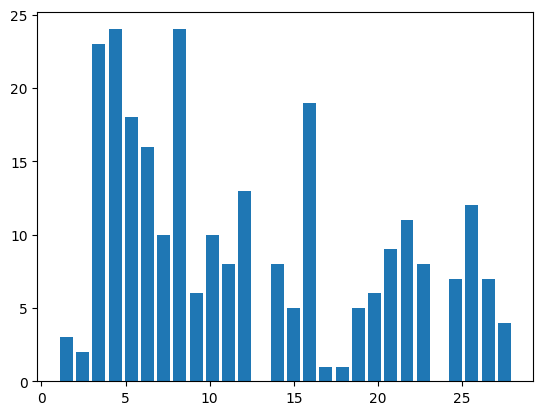

In [29]:
plt.hist(df["Topic"], bins = 28,  histtype='bar', rwidth=0.8) # Plotting an histogram of the number of pledges per topic

In [ ]:
import string

In [36]:
# Defining a new column containing the number of words per pledge

LengthList = [] # List that will contain the number of words of each pledge

for pledge in df["Pledge"]: # Looping over the different pledges from the dataframe

    LengthList.append(len(pledge.split())) # Appending the number of words to the pledge

df["Length"] = LengthList

{'whiskers': [<matplotlib.lines.Line2D at 0x1becce33640>,
 'caps': [<matplotlib.lines.Line2D at 0x1becce33b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1becce333a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1becce3b100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1becce3b3a0>],
 'means': []}

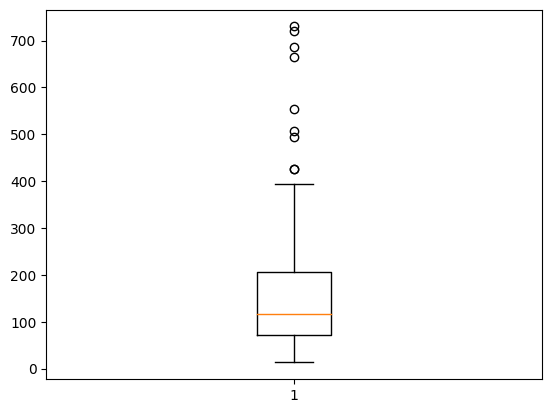

In [37]:
# Plotting the dispersion of the Pledges' length

plt.boxplot(df["Length"])

In [41]:
# Identifying the outliers

df.loc[df["Length"] > 400, "Topic"]

26      3
69      5
83      6
91      7
97      8
110    28
146    12
211    22
258    28
Name: Topic, dtype: int64

In [38]:
import seaborn as sns

<Axes: xlabel='Topic', ylabel='Length'>

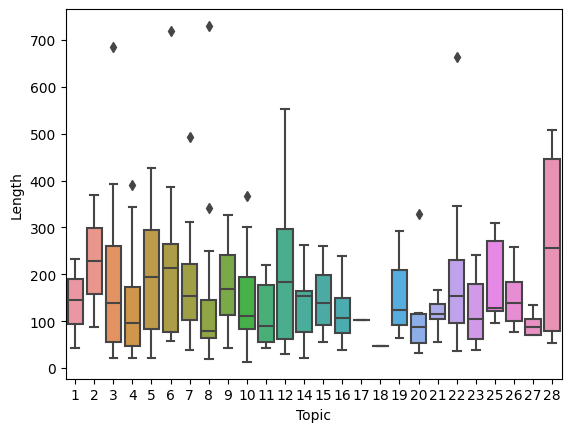

In [39]:
sns.boxplot(x = df["Topic"], y = df["Length"]) # Boxplots of length by topic